## DATA 620 - Project 1

In [1]:
# import necessary packages

import networkx as nx
import pandas as pd
##import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from operator import itemgetter
#import community                    # only needed if looking at communities

###   Data Import and Preparation

In [2]:
#Read the Las Vegas businesses data into a pandas data frame

file = "https://raw.githubusercontent.com/vbriot28/datascienceCUNY_620/master/LasVegas_clean.csv"
business = pd.read_csv(file,  header=0)

business.shape

# subset to "The Strip" neighborhood
business = business[(business.neighborhoods=="The Strip")]

#business[business['neighborhoods'].isin(["The Strip", "Spring Valley"])]

# convert categorical variables to Yes, No, and Unknown
business['Delivery'] = business['Delivery'].map({'FALSE': 'No', 'TRUE': 'Yes', 'Unknown': 'Unknown'})
business['Take-out'] = business['Take-out'].map({'FALSE': 'No', 'TRUE': 'Yes', 'Unknown': 'Unknown'})
business['Waiter Service'] = business['Waiter Service'].map({'FALSE': 'No', 'TRUE': 'Yes', 'Unknown': 'Unknown'})

# drop the first column
business.drop(business.columns[0],axis=1,inplace=True)

In [3]:
# df row and columns
business.shape


(603, 16)

In [4]:
business.dtypes

business_id        object
name               object
addl1              object
addl2              object
city               object
state              object
zip                object
neighborhoods      object
open                 bool
review_count        int64
stars             float64
Delivery           object
Take-out           object
Waiter Service     object
longitude         float64
latitude          float64
dtype: object

In [5]:
# see what the data looks like
business.head(10)

,business_id,name,addl1,addl2,city,state,zip,neighborhoods,open,review_count,stars,Delivery,Take-out,Waiter Service,longitude,latitude
38,cZxez9tUb9hqV3KXq5YPAQ,India Oven,2218 Paradise Rd,The Strip,Las Vegas,NV,89104,The Strip,True,78,3.5,No,Yes,Yes,-115.155176,36.144700
49,YZuHOgbKiP3dN4_ROOUyDQ,Golden Steer,308 W Sahara Ave,The Strip,Las Vegas,NV,89102,The Strip,True,304,3.5,No,No,Yes,-115.161143,36.144093
52,SkxqO4FgEJebz7kCzjvYYQ,Adar Kosher Pizza Restaurant,318 W Sahara Ave,The Strip,Las Vegas,NV,89102,The Strip,True,14,2.0,Yes,Yes,Yes,-115.161084,36.143839
53,Yin_BwfzTOdC8VY9ZD4K6w,Capriotti's Sandwich Shop,322 W. Sahara,The Strip,Las Vegas,NV,89102,The Strip,True,236,4.5,Yes,Yes,No,-115.161461,36.144129
88,uy9IblmbJogF1TEUc6JHzw,Buffet At the Stratosphere,2000 Las Vegas Blvd S,The Strip,Las Vegas,NV,89104,The Strip,True,81,2.5,No,No,Yes,-115.155365,36.147371
89,83C1eqPfmQHTy_8MC4Ug6w,Roxy's Diner,Stratosphere Casino,,Las Vegas,NV,&,The Strip,True,159,3.0,No,Yes,Yes,-115.155206,36.147710
92,dH3rJa4JSxmlyAwg8kPLOQ,Denny's,1826 Las Vegas Blvd S,The Strip,Las Vegas,NV,89104,The Strip,True,28,3.0,No,Yes,Yes,-115.153874,36.149394
352,8kmIIK2YE6Rcg3HaDVha3w,The Range Steakhouse,Harrahs Las Vegas,3475 S Las Vegas Blvd,Las Vegas,NV,89152,The Strip,False,106,4.0,No,No,Yes,-115.171033,36.122668
480,I0kZ5AgtltKOpZIY8jOJBQ,Subway,3411 Las Vegas Blvd S,The Strip,Las Vegas,NV,89109,The Strip,True,8,2.0,No,Yes,No,-115.171999,36.120665
481,dm4thvdDU9MKk8sbo6WuBg,Noble Roman's Pizza,3411 Las Vegas Blvd S,The Strip,Las Vegas,NV,89109,The Strip,True,10,3.0,No,Yes,No,-115.172115,36.120954


In [6]:
# import the business edgelist 

file = "https://raw.githubusercontent.com/kfolsom98/DATA620/master/Project1/data/edgelist_2015.csv"
edges = pd.read_csv(file,  header=0)

edges.dtypes

source              object
target              object
total_reviews.x      int64
rating_sum.x         int64
mean_rating.x      float64
total_reviews.y      int64
rating_sum.y         int64
mean_rating.y      float64
n                    int64
mean_rating        float64
dtype: object

In [7]:
# see what the data looks like
edges.head(10)

,source,target,total_reviews.x,rating_sum.x,mean_rating.x,total_reviews.y,rating_sum.y,mean_rating.y,n,mean_rating
0,AG3jFaQcABSFF-ry3l5t5g,glmwOs55H49Q_D8ENZtqYQ,3,7,2.333333,4,12,3.000000,7,2.714286
1,AG3jFaQcABSFF-ry3l5t5g,MnoF8A3UAghzXKSunNSn2Q,3,7,2.333333,2,4,2.000000,5,2.200000
2,AdEFp9zXwOO84mc1OC37aA,moX-9x1Z76IlcAM3bAu4bg,10,47,4.700000,4,14,3.500000,14,4.357143
3,AdEFp9zXwOO84mc1OC37aA,cny9rhnhcYsJuTq2q4wp2A,10,47,4.700000,6,20,3.333333,16,4.187500
4,AdEFp9zXwOO84mc1OC37aA,-5RN56jH78MV2oquLV_G8g,10,47,4.700000,4,18,4.500000,14,4.642857
5,QhwkFogGQA-Ar176Ul5PUQ,s5-VDvUqyYnD8RG3LPqnbQ,49,195,3.979592,26,95,3.653846,75,3.866667
6,QhwkFogGQA-Ar176Ul5PUQ,Iyy4pDmnKTZkAorzclO4Eg,49,195,3.979592,6,29,4.833333,55,4.072727
7,QhwkFogGQA-Ar176Ul5PUQ,sIyHTizqAiGu12XMLX3N3g,49,195,3.979592,42,153,3.642857,91,3.824176
8,QhwkFogGQA-Ar176Ul5PUQ,eq6lQI039SBLC6sHm3idGA,49,195,3.979592,18,81,4.500000,67,4.119403
9,QhwkFogGQA-Ar176Ul5PUQ,zt1TpTuJ6y9n551sw9TaEg,49,195,3.979592,22,67,3.045455,71,3.690141


In [8]:
# take soure, target, and mean_rating for the weight
edgeslist = edges[['source','target', 'mean_rating']]

### Graph Creation 

In [9]:
G=nx.Graph()

# add each business in The Strip neighborhood as a node
# set node attributes: name, zip, delivery, takeout, and waiter service 
#                 

for index, row in business.iterrows():

    G.add_node(row['business_id'], 
               name=row['name'], 
               delivery=row['Delivery'], 
               takeout=row['Take-out'], 
               waiterservice=row['Waiter Service'])


print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 603
Number of edges: 0
Average degree:   0.0000


In [10]:
# add weighted edges 

G.add_weighted_edges_from([tuple(x) for x in edgeslist.values])

In [ ]:
print(nx.info(G))

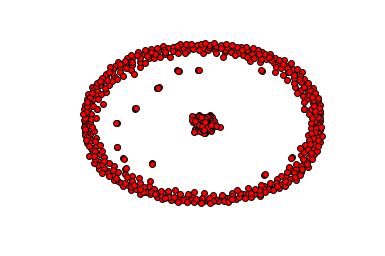

In [35]:
# plot network 
spring_pos = nx.spring_layout(G)

plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size = 35)

### Calculate Centrality Measures

In [22]:
# Calculate Centrality Measures 

## Degree Centrality
degree = nx.degree_centrality(G)

#sIyHTizqAiGu12XMLX3N3g --> top business by degree 

#business[(business.business_id=="sIyHTizqAiGu12XMLX3N3g")].head()

## Betweeness Centrality
bet = nx.betweenness_centrality(G)

# Closeness Centrality
clos = nx.closeness_centrality(G)

## Eigenvector Centrality
eig = nx.eigenvector_centrality(G)

centrality_measures = {
    'degree': degree,
    'eigenvector': eig,
    'betweenness': bet,
    'closeness': clos
}
centrality_df = pd.DataFrame(centrality_measures)

#centrality_df

centrality_df.sort_values(by=['degree', 'eigenvector'], ascending=[0, 0]).head(10)

,betweenness,closeness,degree,eigenvector
sIyHTizqAiGu12XMLX3N3g,0.017549,0.115917,0.042693,0.366041
eq6lQI039SBLC6sHm3idGA,0.007116,0.104903,0.031199,0.294350
BqrTtox0JbG-P_DKBB5bBw,0.006113,0.100146,0.029557,0.252450
aGbjLWzcrnEx2ZmMCFm3EA,0.009283,0.097708,0.029557,0.169242
QhwkFogGQA-Ar176Ul5PUQ,0.009578,0.105656,0.027915,0.256873
2e2e7WgqU1BnpxmQL5jbfw,0.008771,0.103672,0.027915,0.217878
KcWUgvyl64Vp0PfwQRZQkw,0.002922,0.088683,0.024631,0.153580
zt1TpTuJ6y9n551sw9TaEg,0.010879,0.103672,0.024631,0.137031
QbmcCE_cLq4WO8ZMKImaLw,0.013086,0.103916,0.024631,0.131027
s5-VDvUqyYnD8RG3LPqnbQ,0.004691,0.096851,0.022989,0.207487


#### Apply centrality measures to the node 

In [23]:
# Assign each to an attribute in your network
nx.set_node_attributes(G, 'degree', degree)
nx.set_node_attributes(G, 'eigenvector', eig)
nx.set_node_attributes(G, 'betweenness', bet)
nx.set_node_attributes(G, 'closeness', clos)

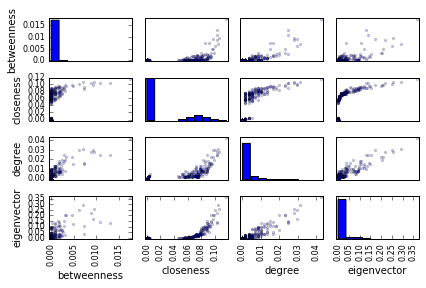

In [40]:
# Pairwise plot of Centrality Measures
axes = pd.tools.plotting.scatter_matrix(centrality_df, alpha=0.2)
plt.tight_layout()
plt.show()


## Analysis

In [27]:
# create a data frame of the node attributes including the centrality measures

node_attr_df = pd.DataFrame([nx.get_node_attributes(G,'name'), 
                             nx.get_node_attributes(G,'delivery'),
                             nx.get_node_attributes(G,'takeout'),
                             nx.get_node_attributes(G,'waiterservice'),
                             nx.get_node_attributes(G,'degree'),
                             nx.get_node_attributes(G,'eigenvector'),
                             nx.get_node_attributes(G,'betweenness'),
                             nx.get_node_attributes(G,'closeness')]).transpose()

# change column names to appropriate names
node_attr_df.columns = ['name', 'delivery', 'takeout', 'waiterservice', 'degree', 'eigenvector', 'betweenness', 'closeness']

# name the index
#node_attr_df.index.names = ['business_id']

# make sure centrality measures are numeric
node_attr_df = node_attr_df.apply(pd.to_numeric,errors='ignore')

In [28]:
node_attr_df.head(5)

,name,delivery,takeout,waiterservice,degree,eigenvector,betweenness,closeness
--zgHBiQpr8H2ZqSdGmguQ,China Star Buffet,No,No,Yes,0.000000,0.000000e+00,0.000000,0.000000
-2n-OHbbwIv3SY8RP9bgTQ,Maggiano's Little Italy,Yes,Yes,Yes,0.001642,1.411059e-25,0.000000,0.001642
-4mNZfAXMd2mxEsD2YRcaQ,McDonald's,No,Yes,No,0.000000,0.000000e+00,0.000000,0.000000
-5RN56jH78MV2oquLV_G8g,Picasso,No,No,Yes,0.014778,1.070825e-01,0.007335,0.091248
-CAxtEWbiPIJlpbWq4qz2A,Tower Pizzeria,No,Yes,No,0.000000,0.000000e+00,0.000000,0.000000


In [31]:
delivery =  node_attr_df.groupby(['delivery']).agg({
                                                    "eigenvector": {
                                                                     "MinEigenvector":    "min",
                                                                     "AvgEigenvector":    "mean",
                                                                     "MedianEigenvector": "median",
                                                                     "MaxEigenvector":    "max" },
                                                    "degree":      {
                                                                     "MinDegree":         "min",
                                                                     "AvgDegree":         "mean",
                                                                     "MedianDegree":      "median",
                                                                     "MaxDegree":         "max"  }}) 

delivery

degree                                        eigenvector  \
         AvgDegree MaxDegree MinDegree MedianDegree MedianEigenvector   
delivery                                                                
No        0.002411  0.042693       0.0          0.0               0.0   
Unknown   0.000000  0.000000       0.0          0.0               0.0   
Yes       0.000821  0.004926       0.0          0.0               0.0   

                                                       
         AvgEigenvector MaxEigenvector MinEigenvector  
delivery                                               
No             0.014074       0.366041            0.0  
Unknown        0.000000       0.000000            0.0  
Yes            0.003190       0.022162            0.0

In [33]:
takeout =  node_attr_df.groupby(['takeout']).agg({
                                                    "eigenvector": {
                                                                     "MinEigenvector":    "min",
                                                                     "AvgEigenvector":    "mean",
                                                                     "MedianEigenvector": "median",
                                                                     "MaxEigenvector":    "max" },
                                                    "degree":      {
                                                                     "MinDegree":         "min",
                                                                     "AvgDegree":         "mean",
                                                                     "MedianDegree":      "median",
                                                                     "MaxDegree":         "max"  }}) 

takeout

degree                                        eigenvector  \
        AvgDegree MaxDegree MinDegree MedianDegree MedianEigenvector   
takeout                                                                
No       0.003152  0.042693       0.0          0.0               0.0   
Unknown  0.000000  0.000000       0.0          0.0               0.0   
Yes      0.002002  0.031199       0.0          0.0               0.0   

                                                      
        AvgEigenvector MaxEigenvector MinEigenvector  
takeout                                               
No            0.018750       0.366041            0.0  
Unknown       0.000000       0.000000            0.0  
Yes           0.011462       0.294350            0.0

In [34]:
waiterservice =  node_attr_df.groupby(['waiterservice']).agg({
                                                    "eigenvector": {
                                                                     "MinEigenvector":    "min",
                                                                     "AvgEigenvector":    "mean",
                                                                     "MedianEigenvector": "median",
                                                                     "MaxEigenvector":    "max" },
                                                    "degree":      {
                                                                     "MinDegree":         "min",
                                                                     "AvgDegree":         "mean",
                                                                     "MedianDegree":      "median",
                                                                     "MaxDegree":         "max"  }}) 


waiterservice

degree                                        eigenvector  \
              AvgDegree MaxDegree MinDegree MedianDegree MedianEigenvector   
waiterservice                                                                
No             0.001178  0.031199       0.0          0.0               0.0   
Unknown        0.000093  0.003284       0.0          0.0               0.0   
Yes            0.002888  0.042693       0.0          0.0               0.0   

                                                            
              AvgEigenvector MaxEigenvector MinEigenvector  
waiterservice                                               
No              7.246243e-03   2.943501e-01            0.0  
Unknown         7.948854e-23   4.212867e-21            0.0  
Yes             1.671913e-02   3.660413e-01            0.0